In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
gold = pd.read_csv('Gold_Price.csv')

In [3]:
gold_price = gold[['Date','Close']]

In [33]:
gold_price

,Date,Close
0,2013-01-02,1687.900024
1,2013-01-03,1673.699951
2,2013-01-04,1648.099976
3,2013-01-07,1645.500000
4,2013-01-08,1661.500000
...,...,...
2668,2023-08-14,1910.599976
2669,2023-08-15,1902.500000
2670,2023-08-16,1896.099976
2671,2023-08-17,1884.099976


In [4]:
gold_price['Date'] = pd.to_datetime(gold_price['Date'])

In [5]:
gold_price.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

<Axes: >

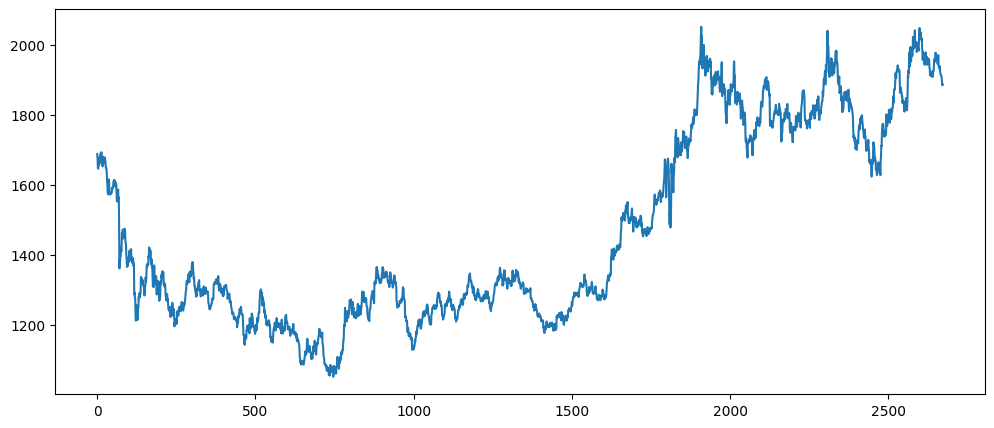

In [6]:
gold_price['Close'].plot(figsize=(12,5))

In [7]:
gold_train=gold_price.head(1870)

In [8]:
gold_test = gold_price.tail(803)

In [9]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [28]:
model = ExponentialSmoothing(gold_train['Close'],trend=None ,seasonal='additive', seasonal_periods=365)
model_fit = model.fit()

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [29]:
start = len(gold_train)
end = len(gold_train) + len(gold_test) - 1
pred = model_fit.predict(start=start, end=end).rename('Exponential')

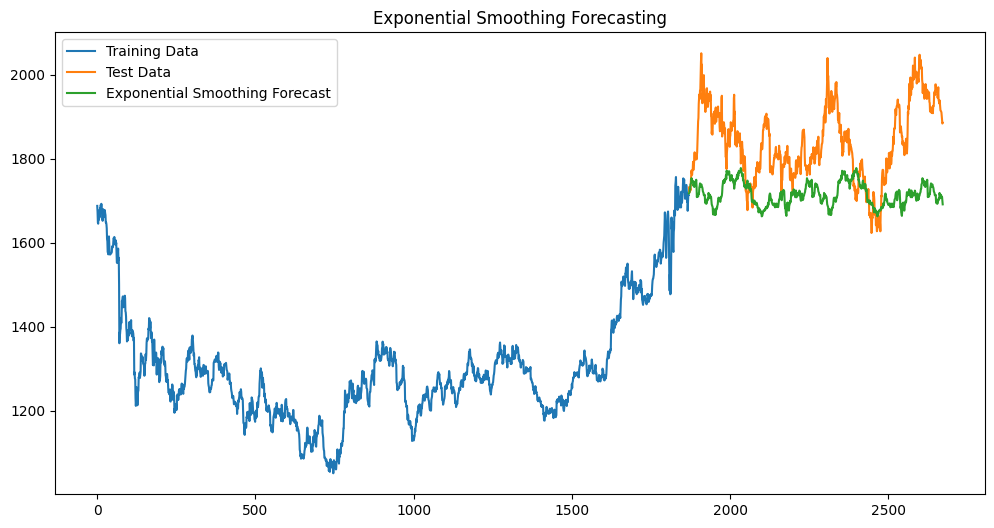

In [30]:
plt.figure(figsize=(12, 6))
gold_train['Close'].plot(legend=True, label='Training Data')
gold_test['Close'].plot(legend=True, label='Test Data')
pred.plot(legend=True, label='Exponential Smoothing Forecast')
plt.legend()
plt.title('Exponential Smoothing Forecasting')
plt.show()

In [18]:
from statsmodels.tsa.holtwinters import Holt

In [19]:
holt_model = Holt(gold_train["Close"]).fit()

In [20]:
start = len(gold_train)
end = len(gold_train) + len(gold_test) - 1
pred_holt = holt_model.predict(start=start, end=end).rename('Holt')

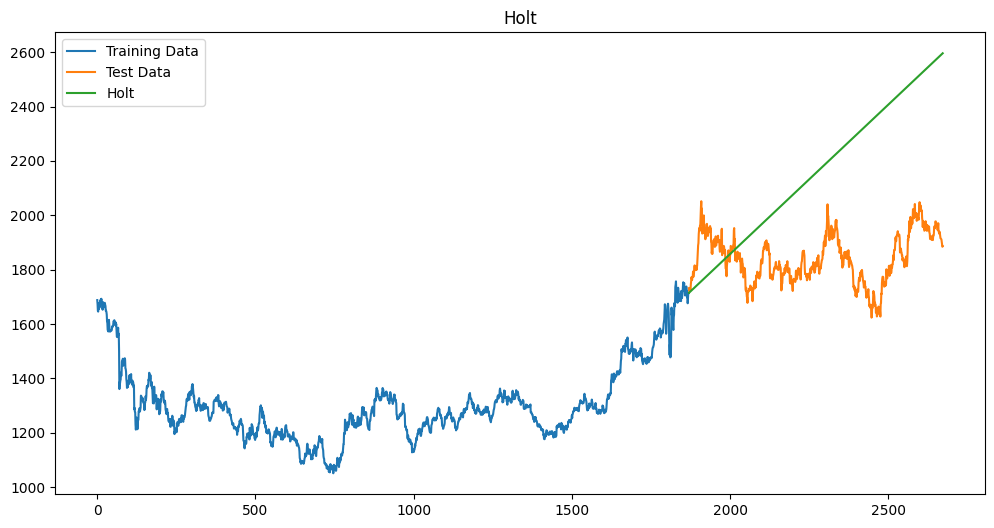

In [31]:
plt.figure(figsize=(12, 6))
gold_train['Close'].plot(legend=True, label='Training Data')
gold_test['Close'].plot(legend=True, label='Test Data')
pred_holt.plot(legend=True, label='Holt')
plt.legend()
plt.title('Holt')
plt.show()

In [36]:
model_final = ExponentialSmoothing(gold_price['Close'],trend=None ,seasonal='additive', seasonal_periods=365)
model_fit_final = model_final.fit()

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [37]:
pred_final=model_fit_final.forecast(30)

In [38]:
pred_final

2673    1891.842806
2674    1881.147525
2675    1883.439033
2676    1873.664215
2677    1867.738932
2678    1871.485666
2679    1871.433016
2680    1874.384265
2681    1873.784845
2682    1862.650435
2683    1862.459858
2684    1871.006910
2685    1873.967245
2686    1877.978135
2687    1876.395286
2688    1876.301322
2689    1878.155017
2690    1885.649298
2691    1883.399137
2692    1893.835756
2693    1893.930306
2694    1894.051459
2695    1894.872016
2696    1897.213088
2697    1891.504030
2698    1890.724526
2699    1892.331698
2700    1894.382013
2701    1905.220527
2702    1898.187182
dtype: float64

<Axes: >

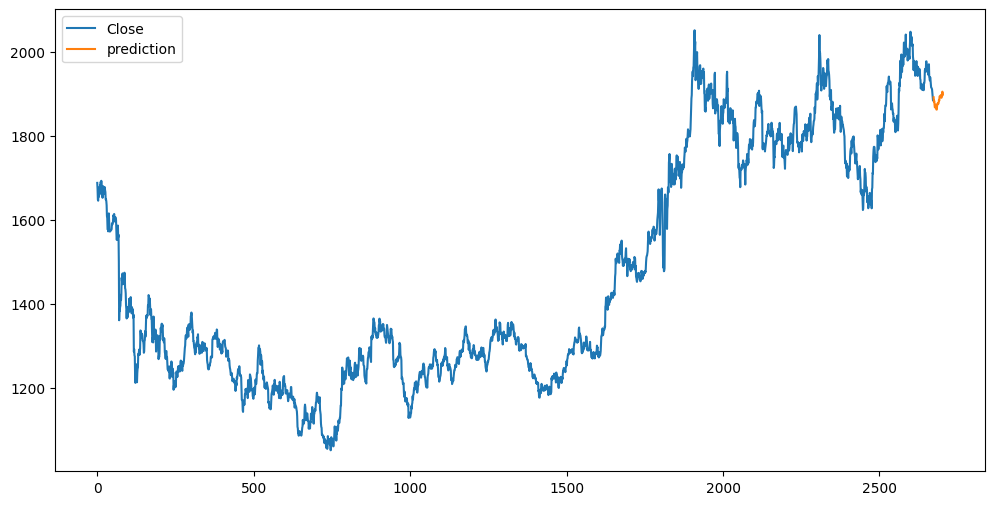

In [50]:
plt.figure(figsize=(12, 6))
gold_price['Close'].plot(legend=True, label='Close')
pred_final.plot(legend=True, label='prediction')